# Linear regression with various methods
This is a very simple example of using two scipy tools for linear regression.
* Scipy.Polyfit
* Stats.linregress
* Optimize.curve_fit
* numpy.linalg.lstsq
* statsmodels.OLS
* Analytic solution using Moore-Penrose generalized inverse or simple multiplicative matrix inverse
* sklearn.linear_model.LinearRegression

## Import libraries

In [2]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
%matplotlib inline

C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Generate random data of a sufficiently large size

In [2]:
#Sample data creation
#number of points 
n=int(5e6)
t=np.linspace(-10,10,n)
#parameters
a=3.25; b=-6.5
x=polyval([a,b],t)
#add some noise
xn=x+3*randn(n)

### Draw few random sample points and plot

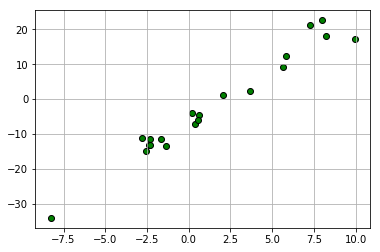

In [3]:
xvar=np.random.choice(t,size=20)
yvar=polyval([a,b],xvar)+3*randn(20)
plt.scatter(xvar,yvar,c='green',edgecolors='k')
plt.grid(True)
plt.show()

## Method: Scipy.Polyfit

In [4]:
#Linear regressison -polyfit - polyfit can be used other orders polynomials
t1=time.time()
(ar,br)=polyfit(t,xn,1)
xr=polyval([ar,br],t)
#compute the mean square error
err=sqrt(sum((xr-xn)**2)/n)
t2=time.time()
t_polyfit = float(t2-t1)

print('Linear regression using polyfit')
print('parameters: a=%.2f b=%.2f, ms error= %.3f' % (ar,br,err))
print("Time taken: {} seconds".format(t_polyfit))

Linear regression using polyfit
parameters: a=3.25 b=-6.50, ms error= 3.000
Time taken: 1.7698638439178467 seconds


## Method: Stats.linregress

In [5]:
#Linear regression using stats.linregress
t1=time.time()
(a_s,b_s,r,tt,stderr)=stats.linregress(t,xn)
t2=time.time()
t_linregress = float(t2-t1)

print('Linear regression using stats.linregress')
print('a=%.2f b=%.2f, std error= %.3f, r^2 coefficient= %.3f' % (a_s,b_s,stderr,r))
print("Time taken: {} seconds".format(t_linregress))

Linear regression using stats.linregress
a=3.25 b=-6.50, std error= 0.000, r^2 coefficient= 0.987
Time taken: 0.15017366409301758 seconds


## Method: Optimize.curve_fit

In [5]:
def flin(t,a,b):
    result = a*t+b
    return(result)

In [7]:
t1=time.time()
p1,_=optimize.curve_fit(flin,xdata=t,ydata=xn,method='lm')
t2=time.time()
t_optimize_curve_fit = float(t2-t1)

print('Linear regression using optimize.curve_fit')
print('parameters: a=%.2f b=%.2f' % (p1[0],p1[1]))
print("Time taken: {} seconds".format(t_optimize_curve_fit))

Linear regression using optimize.curve_fit
parameters: a=3.25 b=-6.50
Time taken: 1.2034447193145752 seconds


## Method: numpy.linalg.lstsq

In [8]:
t1=time.time()
A = np.vstack([t, np.ones(len(t))]).T
result = np.linalg.lstsq(A, xn)
ar,br = result[0]
err = np.sqrt(result[1]/len(xn))
t2=time.time()
t_linalg_lstsq = float(t2-t1)

print('Linear regression using numpy.linalg.lstsq')
print('parameters: a=%.2f b=%.2f, ms error= %.3f' % (ar,br,err))
print("Time taken: {} seconds".format(t_linalg_lstsq))

Linear regression using numpy.linalg.lstsq
parameters: a=3.25 b=-6.50, ms error= 3.000
Time taken: 0.3698573112487793 seconds


## Method: Statsmodels.OLS

In [9]:
t1=time.time()
t=sm.add_constant(t)
model = sm.OLS(x, t)
results = model.fit()
ar=results.params[1]
br=results.params[0]
t2=time.time()
t_OLS = float(t2-t1)

print('Linear regression using statsmodels.OLS')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_OLS))      

Linear regression using statsmodels.OLS
parameters: a=3.25 b=-6.50
Time taken: 0.9167804718017578 seconds


In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.287e+34
Date:                Fri, 08 Dec 2017   Prob (F-statistic):               0.00
Time:                        23:09:33   Log-Likelihood:             1.3904e+08
No. Observations:             5000000   AIC:                        -2.781e+08
Df Residuals:                 4999998   BIC:                        -2.781e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5000   9.06e-17  -7.17e+16      0.0

## Analytic solution using Moore-Penrose pseudoinverse

In [11]:
t1=time.time()
mpinv = np.linalg.pinv(t)
result = mpinv.dot(x)
ar = result[1]
br = result[0]
t2=time.time()
t_inv_matrix = float(t2-t1)

print('Linear regression using Moore-Penrose inverse')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_inv_matrix)) 

Linear regression using Moore-Penrose inverse
parameters: a=3.25 b=-6.50
Time taken: 0.6019864082336426 seconds


## Analytic solution using simple multiplicative matrix inverse

In [12]:
t1=time.time()
m = np.dot((np.dot(np.linalg.inv(np.dot(t.T,t)),t.T)),x)
ar = m[1]
br = m[0]
t2=time.time()
t_simple_inv = float(t2-t1)

print('Linear regression using simple inverse')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_simple_inv)) 

Linear regression using simple inverse
parameters: a=3.25 b=-6.50
Time taken: 0.13125276565551758 seconds


## Method: sklearn.linear_model.LinearRegression

In [13]:
t1=time.time()
lm = LinearRegression()
lm.fit(t,x)
ar=lm.coef_[1]
br=lm.intercept_
t2=time.time()
t_sklearn_linear = float(t2-t1)

print('Linear regression using sklearn.linear_model.LinearRegression')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_sklearn_linear)) 

Linear regression using sklearn.linear_model.LinearRegression
parameters: a=3.25 b=-6.50
Time taken: 0.5318112373352051 seconds


## Bucket all the execution times in a list and plot

In [14]:
times = [t_polyfit,t_linregress,t_optimize_curve_fit,t_linalg_lstsq,t_OLS,t_inv_matrix,t_simple_inv,t_sklearn_linear]

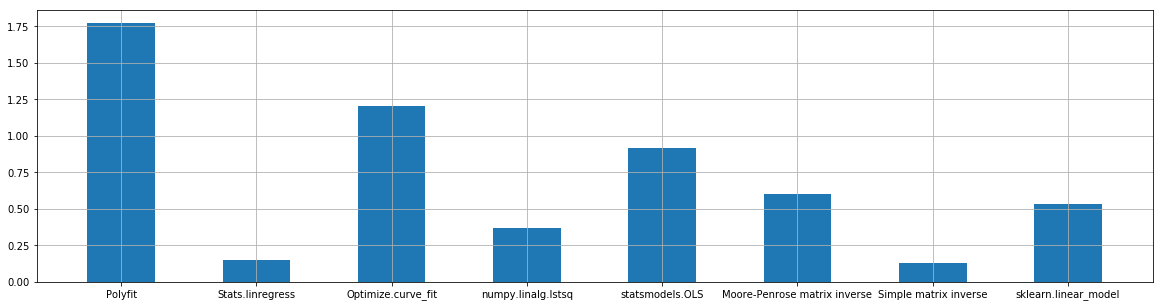

In [15]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.bar(left=[l*0.8 for l in range(8)],height=times, width=0.4,
        tick_label=['Polyfit','Stats.linregress','Optimize.curve_fit',
                    'numpy.linalg.lstsq','statsmodels.OLS','Moore-Penrose matrix inverse',
                    'Simple matrix inverse','sklearn.linear_model'])
plt.show()

In [3]:
n_min = 50000
n_max = int(1e7)
n_levels = 25
r = np.log10(n_max/n_min)
l = np.linspace(0,r,n_levels)
n_data = list((n_min*np.power(10,l)))
n_data = [int(n) for n in n_data]

In [6]:
#time_dict={'Polyfit':[],'Stats.lingress':[],'Optimize.curve_fit':[],'linalg.lstsq':[],'statsmodels.OLS':[],
          #'Moore-Penrose matrix inverse':[],'Simple matrix inverse':[], 'sklearn.linear_model':[]}

l1=['Polyfit', 'Stats.lingress','Optimize.curve_fit', 'linalg.lstsq', 
 'statsmodels.OLS', 'Moore-Penrose matrix inverse', 'Simple matrix inverse', 'sklearn.linear_model']
time_dict = {key:[] for key in l1}

from tqdm import tqdm

for i in tqdm(range(len(n_data))):
    t=np.linspace(-10,10,n_data[i])
    #parameters
    a=3.25; b=-6.5
    x=polyval([a,b],t)
    #add some noise
    xn=x+3*randn(n_data[i])
    
    #Linear regressison -polyfit - polyfit can be used other orders polynomials
    t1=time.time()
    (ar,br)=polyfit(t,xn,1)
    t2=time.time()
    t_polyfit = 1e3*float(t2-t1)
    time_dict['Polyfit'].append(t_polyfit)
    
    #Linear regression using stats.linregress
    t1=time.time()
    (a_s,b_s,r,tt,stderr)=stats.linregress(t,xn)
    t2=time.time()
    t_linregress = 1e3*float(t2-t1)
    time_dict['Stats.lingress'].append(t_linregress)
    
    #Linear regression using optimize.curve_fit
    t1=time.time()
    p1,_=optimize.curve_fit(flin,xdata=t,ydata=xn,method='lm')
    t2=time.time()
    t_optimize_curve_fit = 1e3*float(t2-t1)
    time_dict['Optimize.curve_fit'].append(t_optimize_curve_fit)
    
    # Linear regression using np.linalg.lstsq (solving Ax=B equation system)
    t1=time.time()
    A = np.vstack([t, np.ones(len(t))]).T
    result = np.linalg.lstsq(A, xn)
    ar,br = result[0]
    t2=time.time()
    t_linalg_lstsq = 1e3*float(t2-t1)
    time_dict['linalg.lstsq'].append(t_linalg_lstsq)
    
    # Linear regression using statsmodels.OLS
    t1=time.time()
    t=sm.add_constant(t)
    model = sm.OLS(x, t)
    results = model.fit()
    ar=results.params[1]
    br=results.params[0]
    t2=time.time()
    t_OLS = 1e3*float(t2-t1)
    time_dict['statsmodels.OLS'].append(t_OLS)
    
    # Linear regression using Moore-Penrose pseudoinverse matrix
    t1=time.time()
    mpinv = np.linalg.pinv(t)
    result = mpinv.dot(x)
    ar = result[1]
    br = result[0]
    t2=time.time()
    t_mpinverse = 1e3*float(t2-t1)
    time_dict['Moore-Penrose matrix inverse'].append(t_mpinverse)
    
    # Linear regression using simple multiplicative inverse matrix
    t1=time.time()
    m = np.dot((np.dot(np.linalg.inv(np.dot(t.T,t)),t.T)),x)
    ar = m[1]
    br = m[0]
    t2=time.time()
    t_simple_inv = 1e3*float(t2-t1)
    time_dict['Simple matrix inverse'].append(t_simple_inv)
    
    # Linear regression using scikit-learn's linear_model
    t1=time.time()
    lm = LinearRegression()
    lm.fit(t,x)
    ar=lm.coef_[1]
    br=lm.intercept_
    t2=time.time()
    t_sklearn_linear = 1e3*float(t2-t1)
    time_dict['sklearn.linear_model'].append(t_sklearn_linear)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:51<00:00,  2.05s/it]


In [7]:
df = pd.DataFrame(data=time_dict)
df

,Moore-Penrose matrix inverse,Optimize.curve_fit,Polyfit,Simple matrix inverse,Stats.lingress,linalg.lstsq,sklearn.linear_model,statsmodels.OLS
0,0.000000,0.000000,15.630484,0.000000,0.000000,15.625477,15.621424,15.629292
1,0.000000,0.000000,15.630245,0.000000,0.000000,0.000000,0.000000,22.155523
2,15.622139,15.624523,15.627623,0.000000,0.000000,0.000000,0.000000,15.625715
3,15.625238,15.636921,22.137165,0.000000,0.000000,0.000000,0.000000,15.619516
4,15.625477,19.137859,15.630722,0.000000,18.176317,0.000000,15.627146,15.618801
5,4.007816,31.253576,22.130489,0.000000,15.628815,15.621901,31.254768,33.256292
6,18.633366,53.041935,31.249762,3.501654,0.000000,0.000000,15.632153,46.875238
7,31.255722,53.006411,46.876192,0.000000,0.000000,31.256199,31.252623,37.758827
8,15.657902,69.021463,32.253742,15.627623,15.626431,15.619516,31.259298,68.526506
9,31.253576,84.650755,47.293186,0.000000,15.624762,31.246662,37.778139,69.011211


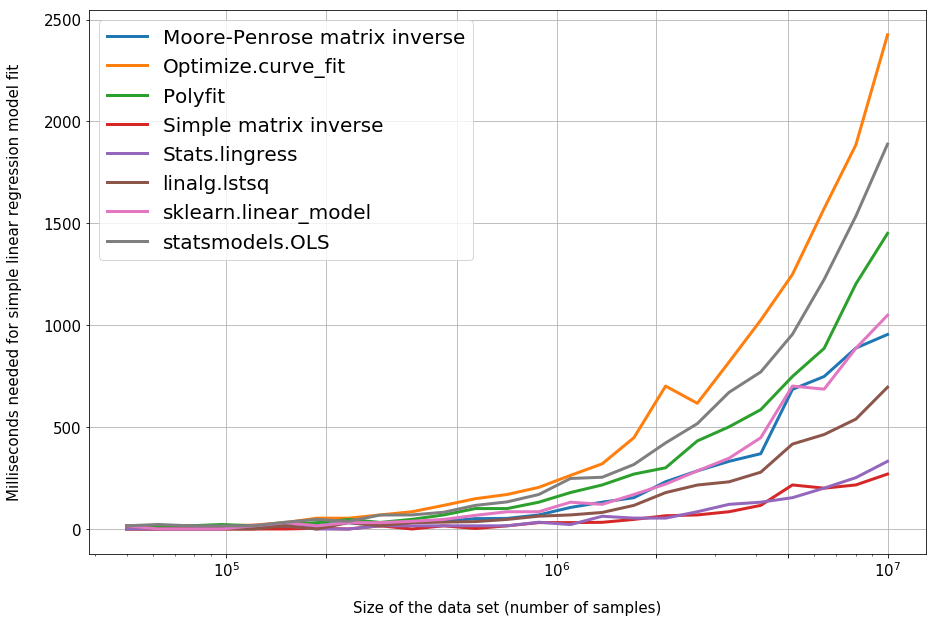

In [8]:
plt.figure(figsize=(15,10))
for i in df.columns:
    plt.semilogx((n_data),df[i],lw=3)
plt.xticks([1e5,2e5,5e5,1e6,2e6,5e6,1e7],fontsize=15)
plt.xlabel("\nSize of the data set (number of samples)",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Milliseconds needed for simple linear regression model fit\n",fontsize=15)
plt.grid(True)
plt.legend([name for name in df.columns],fontsize=20)

In [9]:
a1=df.iloc[n_levels-1]

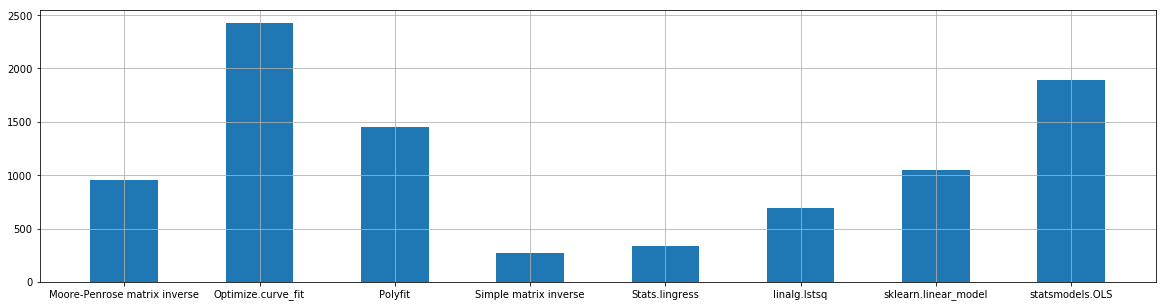

In [10]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.bar(left=[l*0.8 for l in range(8)],height=a1, width=0.4,
        tick_label=list(a1.index))
plt.show()